<a href="https://colab.research.google.com/github/vishalc412/My-Projects/blob/master/langraphpoc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install langgraph langsmith

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 145.8/145.8 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.7/44.7 kB 1.4 MB/s eta 0:00:00


In [2]:
!pip install langchain langchain_groq langchain_community

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 28.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 46.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.7/109.7 kB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 412.7/412.7 kB 27.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.8/50.8 kB 3.8 MB/s eta 0:00:00
  Attempting uninstall: langchain-core
    Found existing installation: langchain-core 0.3.31
    Uninstalling langchain-core-0.3.31:
      Successfully uninstalled langchain-core-0.3.31
  Attempting uninstall: langchain
    Found existing installation: langchain 0.3.15
    Uninstalling langchain-0.3.15:
      Successfully uninstalled langchain-0.3.15


In [5]:
from google.colab import userdata
groq_api_key = userdata.get('groq_api_key')
langsmit_api_key = userdata.get('langgraph_api_key')
import os
os.environ['GROQ_API_KEY'] = groq_api_key
os.environ['LANGCHAIN_API_KEY'] = langsmit_api_key
os.environ['LANGCHAIN_TRACING_V2'] = 'true'
os.environ['LANGCHAIN_PROJECT'] = 'langgraph-demo'

In [7]:
from langchain_groq import ChatGroq

In [38]:
from ast import mod
llm = ChatGroq(groq_api_key=groq_api_key,model_name="gemma2-9b-it")

In [39]:
llm

ChatGroq(client=<groq.resources.chat.completions.Completions object at 0x7f7fcf2e07d0>, async_client=<groq.resources.chat.completions.AsyncCompletions object at 0x7f7fcf257410>, model_name='gemma2-9b-it', model_kwargs={}, groq_api_key=SecretStr('**********'))

## Building chatbot using langgraph and groq

In [40]:
from typing import Annotated
from typing_extensions import TypedDict
from langgraph.graph import StateGraph,START,END
from langgraph.graph.message import add_messages

In [41]:
class State(TypedDict):
    #Message have type "list". the add_message function in annotation defines how state key should be updated
  messages:Annotated[list,add_messages]

graph_builder=StateGraph(State)


In [42]:
graph_builder

In [43]:
def chatbot(state:State):
  return{"messages":llm.invoke(state['messages'])}

In [44]:
graph_builder.add_node("chatbot",chatbot)

In [45]:
graph_builder.add_edge(START,"chatbot")
graph_builder.add_edge("chatbot",END)

In [49]:
graph=graph_builder.compile()

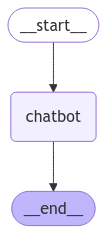

In [50]:
graph_builder.compile()

In [53]:
while True:
  user_input = input("User: ")
  if user_input.lower() in ["quit","q","exit"]:
    print("Goodbye!")
    break
  for event in graph.stream({'messages':("user",user_input)}):
    print(event.values())
    for value in event.values():
      print(value['messages'])
      print("Assistant:",value["messages"].content)

User: hi
dict_values([{'messages': AIMessage(content='Hello! 👋 \n\nHow can I help you today? 😊\n', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 16, 'prompt_tokens': 10, 'total_tokens': 26, 'completion_time': 0.029090909, 'prompt_time': 3.9e-07, 'queue_time': 0.021107649, 'total_time': 0.029091299}, 'model_name': 'gemma2-9b-it', 'system_fingerprint': 'fp_10c08bf97d', 'finish_reason': 'stop', 'logprobs': None}, id='run-87c5a5b4-f41e-41c7-b89e-2544d559d34d-0', usage_metadata={'input_tokens': 10, 'output_tokens': 16, 'total_tokens': 26})}])
content='Hello! 👋 \n\nHow can I help you today? 😊\n' additional_kwargs={} response_metadata={'token_usage': {'completion_tokens': 16, 'prompt_tokens': 10, 'total_tokens': 26, 'completion_time': 0.029090909, 'prompt_time': 3.9e-07, 'queue_time': 0.021107649, 'total_time': 0.029091299}, 'model_name': 'gemma2-9b-it', 'system_fingerprint': 'fp_10c08bf97d', 'finish_reason': 'stop', 'logprobs': None} id='run-87c5a5b4-f41e-41c7